# CSAL4243: Introduction to Machine Learning
Muhammad Mudassir Khan (mudasssir.khan@ucp.edu.pk)

# Lecture 9: Logistic Regression and kNN Examples

### Overview

- [University Admission Dataset](#University-Admission-Dataset)
    - [K - Nearest Neighbor (kNN) Classifier](#K-Nearest-Neighbor-kNN-Classifier)
    - [Logistic-Regression](#Logistic-Regression)
- [Iris Flower Dataset](#Iris-Flower-Dataset)
    - [K - Nearest Neighbor (kNN) Classifier](#K-Nearest-Neighbor-kNN-Classifier)
    - [Logistic-Regression](#Logistic-Regression)
- [Resources](#Resources)
- [Credits](#Credits)

<br>
<br>

# University Admission Dataset

Find whether a student get admitted into a university based on his score in two exams taken by the university. You have historical data of previous applicants who got admitted and rejected based on their score on these two exams.

## K - Nearest Neighbor (kNN) Classifier

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors

df = pd.read_csv('datasets/exam_dataset1.csv', encoding='utf-8')
n_neighbors = 5

X = np.array(df[['exam1','exam2']])
y = np.array(df[['admission']]).ravel()

h = .02  # step size in the mesh

# # Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    print(clf.score(X,y))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import linear_model

df = pd.read_csv('datasets/exam_dataset1.csv', encoding='utf-8')

X = np.array(df[['exam1','exam2']])
y = np.array(df[['admission']]).ravel()

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)
print(logreg.score(X,y))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

<br>
# Iris Flower Dataset

Using sepal length and width, predict the type of flower.

## K - Nearest Neighbor (kNN) Classifier

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    print(clf.score(X,y))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

<br>
# Logistic Regression

In [ ]:

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)
print(logreg.score(X,y))
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

# Regularization Example

In [148]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn import linear_model

In [149]:
df_reg = pd.read_csv('datasets/exam_dataset1.csv', encoding='utf-8')

X = np.array(df_reg[['exam1','exam2']])
y = np.array(df_reg[['admission']]).ravel()

# X = np.array(df_reg[['x1','x2']])
# y = np.array(df_reg[['label']]).ravel()

In [150]:
#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

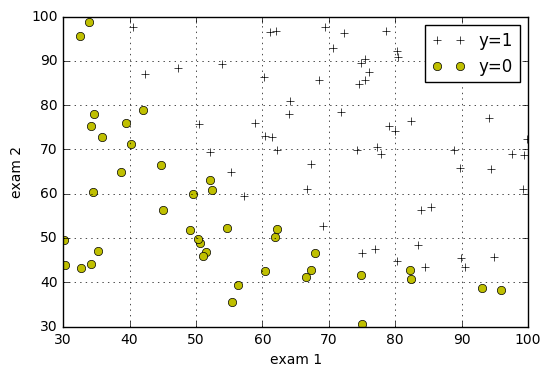

In [151]:
# plot
# plt.figure(figsize=(6,6))
def plotData():
    plt.plot(pos[:,0],pos[:,1],'k+',label='y=1')
    plt.plot(neg[:,0],neg[:,1],'yo',label='y=0')
    plt.xlabel('exam 1')
    plt.ylabel('exam 2')
    plt.legend()
    plt.grid(True)
   
    
plotData() 
plt.show()

In [152]:
#This code I took from someone else (the OCTAVE equivalent was provided in the HW)
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 3
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out

In [153]:
#Create feature-mapped X matrix
X = mapFeature(X[:,0],X[:,1])

In [154]:
X.shape

(100, 10)

In [155]:
# X = np.array(df_reg[['exam1','exam2','x1_s','x2_s','x1_x2']])
# y = np.array(df_reg[['admission']]).ravel()

In [156]:
def plotBoundary(theta, myX, myy):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, lambda value
    Inside of this function is feature mapping, and the minimization routine.
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, computing whether the hypothesis classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(0,100,100)
    yvals = np.linspace(0,100,100)
#     xvals = np.linspace(-1,1.5,50)
#     yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    mycontour = plt.contour( xvals, yvals, zvals, [0])
    #Kind of a hacky way to display a text on top of the decision boundary
#     myfmt = { 0:'Lambda = %d'%mylambda}
#     plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")

In [157]:
logreg = linear_model.LogisticRegression(fit_intercept=False, C=0.001)

# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y)
print(logreg.score(X,y))


1.0


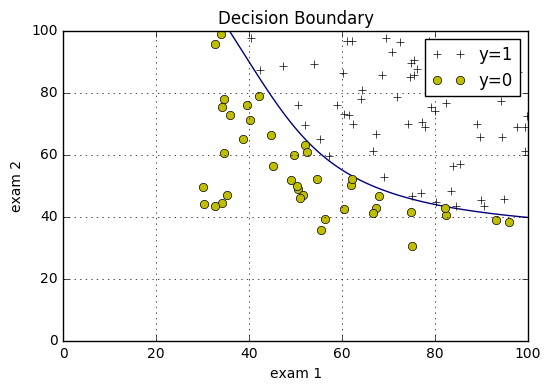

In [158]:
#Build a figure showing contours for various values of regularization parameter, lambda
#It shows for lambda=0 we are overfitting, and for lambda=100 we are underfitting
# plt.figure(figsize=(12,10))
# plt.subplot(221)
plotData()
plotBoundary(logreg.coef_,X,y)

# Resources

Course website: [https://w4zir.github.io/ml17s/](https://w4zir.github.io/ml17s/)

[Course resources](https://github.com/w4zir/ml17s)

# Credits
Raschka, Sebastian. Python machine learning. Birmingham, UK: Packt Publishing, 2015. Print.

[Andrew Ng, Machine Learning, Coursera](#https://www.coursera.org/learn/machine-learning)

[Scikit Learn](http://scikit-learn.org/)

[David Kaleko](https://github.com/kaleko/CourseraML)